In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [71]:
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
X = df.iloc[:,0:20]
y = df.iloc[:,-1]

In [8]:
print(len(X),len(y))

2000 2000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [72]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2)

In [73]:
print(len(X_train),len(y_train),len(X_valid),len(y_valid))

1600 1600 400 400


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

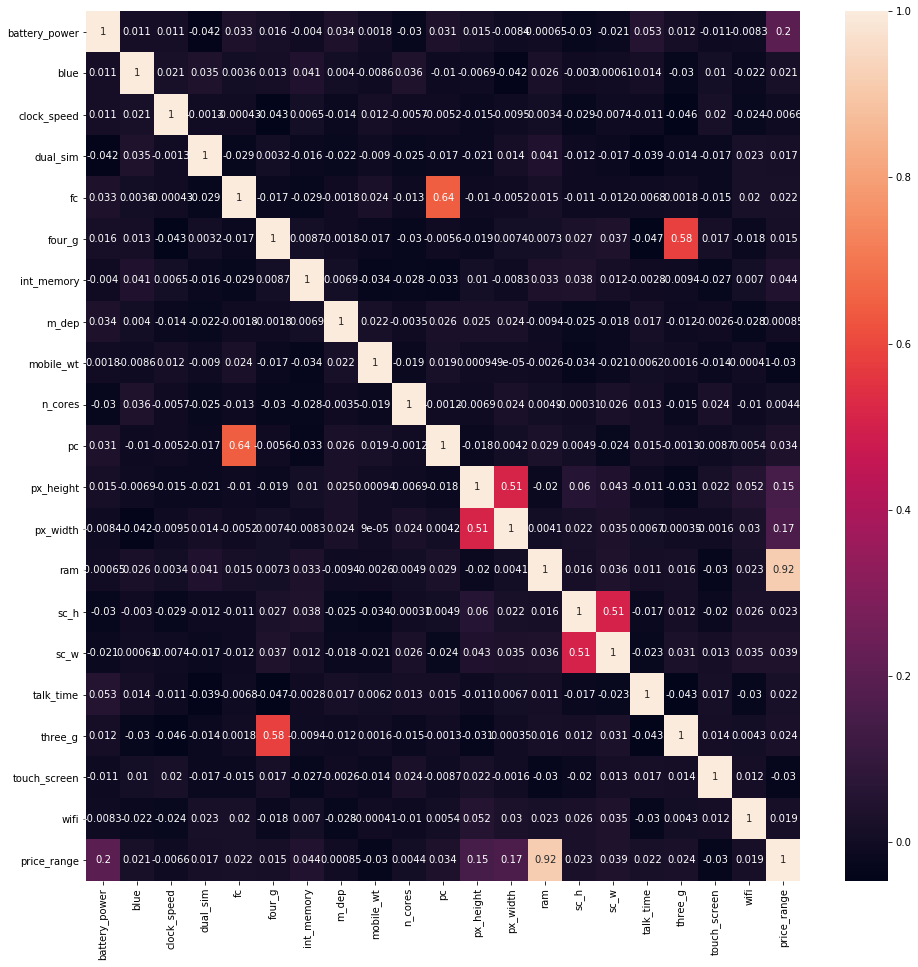

In [69]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True)

In [13]:
from sklearn.feature_selection import SelectKBest , chi2

In [14]:
best_features = SelectKBest(score_func=chi2,k=10)

In [15]:
best_features

SelectKBest(k=10, score_func=<function chi2 at 0x7fceca2ea320>)

In [16]:
fit = best_features.fit(X,y)

In [17]:
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [19]:
df_scores = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(X.columns)

In [26]:
feature_Scores = pd.concat([df_col,df_scores],axis=1)

In [27]:
feature_Scores.columns = ['Features','Score']

In [30]:
feature_Scores = feature_Scores.sort_values(by='Score',ascending=False)

In [58]:
features = feature_Scores.head(10)['Features'].values

In [59]:
features

array(['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt',
       'int_memory', 'sc_w', 'talk_time', 'fc', 'sc_h'], dtype=object)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model = RandomForestClassifier()

In [74]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
model.feature_importances_

array([0.07011652, 0.00620506, 0.03028695, 0.00660133, 0.02582409,
       0.00653304, 0.03469931, 0.02352221, 0.03891177, 0.02288262,
       0.02808792, 0.05673059, 0.05746407, 0.48771812, 0.02925609,
       0.0266613 , 0.03049321, 0.00546929, 0.00675552, 0.00578097])

In [76]:
feature_importance = pd.DataFrame(model.feature_importances_,index=X.columns,columns=['IMPORTANCE'])

In [77]:
feature_importance.sort_values(by='IMPORTANCE',ascending = False,inplace = True)

In [78]:
feature_importance

,IMPORTANCE
ram,0.487718
battery_power,0.070117
px_width,0.057464
px_height,0.056731
mobile_wt,0.038912
int_memory,0.034699
talk_time,0.030493
clock_speed,0.030287
sc_h,0.029256
pc,0.028088


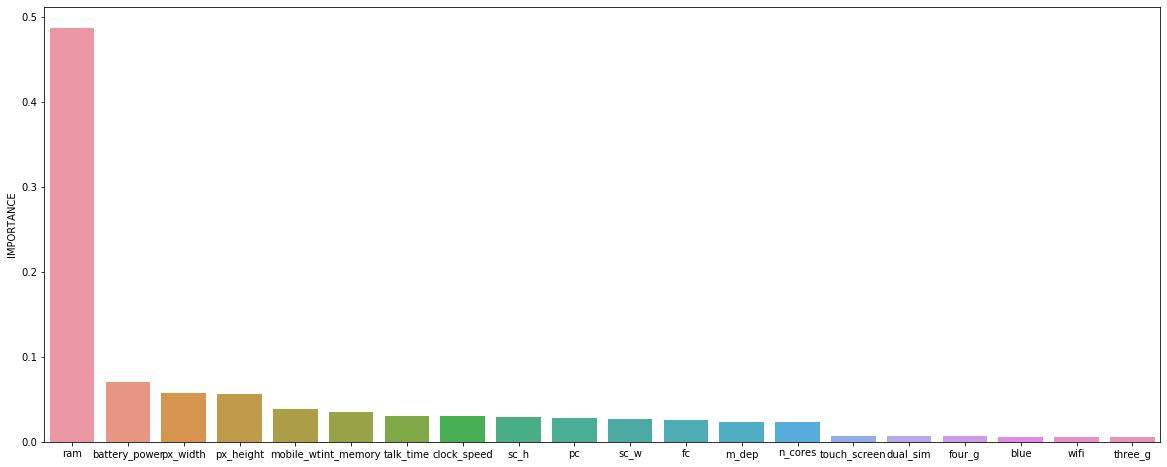

In [79]:
plt.figure(figsize=(20,8))
sns.barplot(x=feature_importance.index,y='IMPORTANCE',data = feature_importance)

In [51]:
test_src = '/kaggle/input/mobile-price-classification/test.csv'

In [52]:
test = pd.read_csv(test_src)

In [53]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [81]:
pred = model.predict(X_valid)

In [83]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, pred))

Accuracy: 0.87


In [54]:
from sklearn.model_selection import cross_val_score

In [88]:
scores = cross_val_score(model,X_valid[features],y_valid,cv=10)

In [89]:
print("Accuracy is : {}".format(scores.mean()))

Accuracy is : 0.825


ValueError: Number of features of the model must match the input. Model n_features is 20 and input n_features is 21 